In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
'''
FONTOS: Az első feladatáltal visszaadott DataFrame-et kell használni a további feladatokhoz. 
A függvényeken belül mindig készíts egy másolatot a bemenő df-ről, (new_df = df.copy() és ezzel dolgozz tovább.)
'''

In [ ]:
'''
Készíts egy függvényt, ami egy string útvonalat vár paraméterként, és egy DataFrame ad visszatérési értékként.

Egy példa a bemenetre: 'test_data.csv'
Egy példa a kimenetre: df_data
return type: pandas.core.frame.DataFrame
függvény neve: csv_to_df
'''

In [2]:
#1
def csv_to_df(utvonal:str) -> pd.core.frame.DataFrame:
    out=pd.read_csv(utvonal)
    return out

myframe = csv_to_df("StudentsPerformance.csv")
#csv_to_df("StudentsPerformance.csv")

In [ ]:
'''
Készíts egy függvényt, ami egy DataFrame-et vár paraméterként, 
és átalakítja azoknak az oszlopoknak a nevét nagybetűsre amelyiknek neve nem tartalmaz 'e' betüt.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_capitalized
return type: pandas.core.frame.DataFrame
függvény neve: capitalize_columns
'''

In [4]:
#2
def capitalize_columns(frame:pd.DataFrame) -> pd.core.frame.DataFrame:
    pdf = frame.copy()
    for col in frame.columns:
        if 'e' not in col:
            pdf.rename(columns={col:col.upper()}, inplace=True)
    return pdf

capitalize_columns(myframe)

,gender,race/ethnicity,parental level of education,LUNCH,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
'''
Készíts egy függvényt, ahol egy szám formájában vissza adjuk, hogy hány darab diáknak sikerült teljesíteni a matek vizsgát.
(legyen az átmenő ponthatár 50).

Egy példa a bemenetre: df_data
Egy példa a kimenetre: 5
return type: int
függvény neve: math_passed_count
'''

In [5]:
#3
def math_passed_count(frame:pd.DataFrame) -> int:
    pdf = frame.copy()
    out=pdf[pdf['math score'] >= 50 ]
    out=out['math score'].count()
    return out

math_passed_count(myframe)

865

In [ ]:
'''
Készíts egy függvényt, ahol Dataframe ként vissza adjuk azoknak a diákoknak az adatait (sorokat), akik végeztek előzetes gyakorló kurzust.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_did_pre_course
return type: pandas.core.frame.DataFrame
függvény neve: did_pre_course
'''

In [6]:
#4
def did_pre_course(frame:pd.DataFrame) -> pd.core.frame.DataFrame:
    pdf = frame.copy()
    out=pdf[pdf['test preparation course'] == 'completed' ]
    return out

did_pre_course(myframe)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65


In [ ]:
'''
Készíts egy függvényt, ahol a bemeneti Dataframet a diákok szülei végzettségi szintjei alapján csoportosításra kerül,
majd aggregációként vegyük, hogy átlagosan milyen pontszámot értek el a diákok a vizsgákon.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_average_scores
return type: pandas.core.frame.DataFrame
függvény neve: average_scores
'''

In [7]:
#5
def average_scores(frame:pd.DataFrame) -> pd.core.frame.DataFrame:
    pdf = frame.copy()
    #pdf['AVG_score'] = np.average([pdf['math score'], pdf['reading score'], pdf['writing score']])
    #out = pdf.groupby('parental level of education')
    #out = out.aggregate(arg=(np.average(out['math score'] + out['reading score'] + out['writing score'])))

    out = pdf.groupby('parental level of education').mean()
    return out

average_scores(myframe)

C:\Users\Csabi\AppData\Local\Temp\ipykernel_18876\4002162160.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  out = pdf.groupby('parental level of education').mean()


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'age' oszloppal, töltsük fel random 18-66 év közötti értékekkel.
A random.randint() függvényt használd, a random sorsolás legyen seedleve, ennek értéke legyen 42.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_age
return type: pandas.core.frame.DataFrame
függvény neve: add_age
'''

In [11]:
#6
def add_age(frame:pd.DataFrame) -> pd.core.frame.DataFrame:
    pdf = frame.copy()
    np.random.seed(42)
    pdf['age'] = np.random.randint(18,67, size=len(pdf))
    return pdf

add_age(myframe)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,age
0,female,group B,bachelor's degree,standard,none,72,72,74,56
1,female,group C,some college,standard,completed,69,90,88,46
2,female,group B,master's degree,standard,none,90,95,93,32
3,male,group A,associate's degree,free/reduced,none,47,57,44,60
4,male,group C,some college,standard,none,76,78,75,25
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,23
996,male,group C,high school,free/reduced,none,62,55,55,43
997,female,group C,high school,free/reduced,completed,59,71,65,21
998,female,group D,some college,standard,completed,68,78,77,36


In [ ]:
'''
Készíts egy függvényt, ami vissza adja a legjobb teljesítményt elérő női diák pontszámait.

Egy példa a bemenetre: df_data
Egy példa a kimenetre: (99,99,99) #math score, reading score, writing score
return type: tuple
függvény neve: female_top_score
'''

In [13]:
#7
def female_top_score(frame:pd.DataFrame) -> tuple:
    pdf = frame.copy()
    pdf = pdf[pdf['gender'] == 'female' ]
    pdf['SUM'] = (pdf['math score'] + pdf['reading score'] + pdf['writing score'])
    pdf = pdf.sort_values("SUM").tail(1)
    out = (pdf["math score"].values[0], pdf['reading score'].values[0], pdf['writing score'].values[0])
    return out

female_top_score(myframe)

(100, 100, 100)

In [ ]:
'''
Készíts egy függvényt, ami a bementeti Dataframet kiegészíti egy 'grade' oszloppal. 
Számoljuk ki hogy a diákok hány százalékot ((math+reading+writing)/300) értek el a vizsgán, és osztályozzuk őket az alábbi szempontok szerint:

90-100%: A
80-90%: B
70-80%: C
60-70%: D
<60%: F

Egy példa a bemenetre: df_data
Egy példa a kimenetre: df_data_with_grade
return type: pandas.core.frame.DataFrame
függvény neve: add_grade
'''

In [14]:
#8
def add_grade(frame:pd.DataFrame) -> pd.core.frame.DataFrame:
    pdf = frame.copy()
    pdf['percentage'] = ((pdf['math score'] + pdf['reading score'] + pdf['writing score'])/3)
    pdf['grade'] = pdf['percentage'].apply((lambda x: 'F' if x < 60 else ('D' if x < 70 else ('C' if x < 80 else ('B' if x < 90 else ('A' if x >= 90 else None))))))
    return pdf

add_grade(myframe)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,F
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,D
998,female,group D,some college,standard,completed,68,78,77,74.333333,C


In [ ]:
'''
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan oszlop diagrammot,
ami vizualizálja a nemek által elért átlagos matek pontszámot.

Oszlopdiagram címe legyen: 'Average Math Score by Gender'
Az x tengely címe legyen: 'Gender'
Az y tengely címe legyen: 'Math Score'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: math_bar_plot
'''

C:\Users\Csabi\AppData\Local\Temp\ipykernel_18876\3958162984.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.bar(group.groups.keys(),group.mean()['math score'].values)


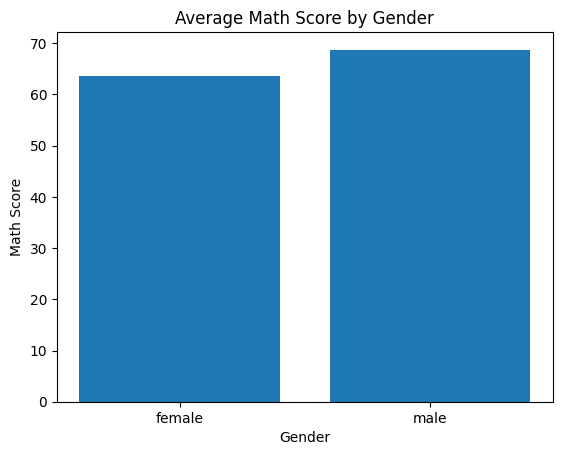

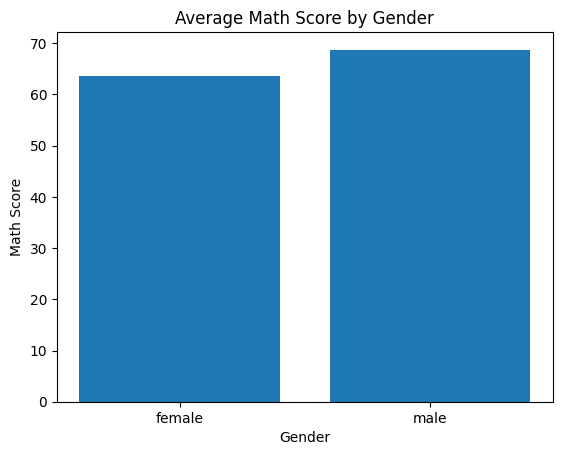

In [16]:
#9
def math_bar_plot(frame:pd.DataFrame) -> plt.figure:
    pdf = frame.copy()

    fig, ax = plt.subplots()
    group=pdf.groupby(['gender'])
    
    ax.bar(group.groups.keys(),group.mean()['math score'].values)

    ax.set_title("Average Math Score by Gender")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Math Score")
    
    return fig

math_bar_plot(myframe)

In [118]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan histogramot,
ami vizualizálja az elért írásbeli pontszámokat.

A histogram címe legyen: 'Distribution of Writing Scores'
Az x tengely címe legyen: 'Writing Score'
Az y tengely címe legyen: 'Number of Students'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: writing_hist
'''

" \nKészíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan histogramot,\nami vizualizálja az elért írásbeli pontszámokat.\n\nA histogram címe legyen: 'Distribution of Writing Scores'\nAz x tengely címe legyen: 'Writing Score'\nAz y tengely címe legyen: 'Number of Students'\n\nEgy példa a bemenetre: df_data\nEgy példa a kimenetre: fig\nreturn type: matplotlib.figure.Figure\nfüggvény neve: writing_hist\n"

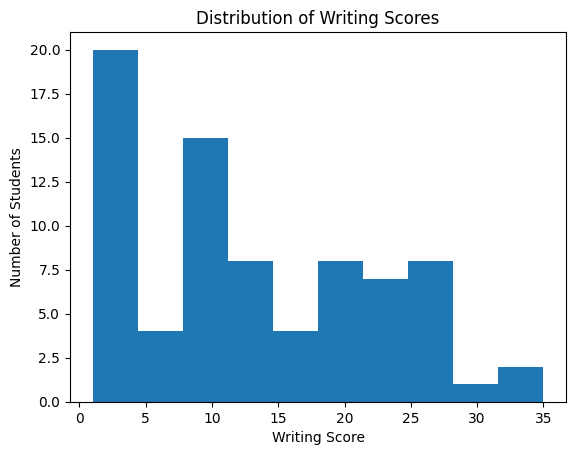

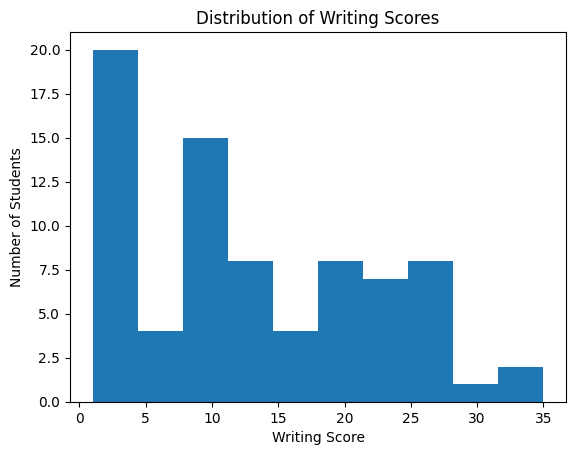

In [21]:
#10
def writing_hist(frame:pd.DataFrame) -> plt.Figure:
    pdf = frame.copy()

    fig, ax = plt.subplots()
    group=pdf.groupby(['writing score'])
    ax.hist(group['gender'].count())

    ax.set_title('Distribution of Writing Scores')
    ax.set_xlabel('Writing Score')
    ax.set_ylabel("Number of Students")
    
    return fig


writing_hist(myframe)

In [ ]:
''' 
Készíts egy függvényt, ami a bemeneti Dataframe adatai alapján elkészít egy olyan kördiagramot,
ami vizualizálja a diákok etnikum csoportok szerinti eloszlását százalékosan.

Érdemes megszámolni a diákok számát, etnikum csoportonként,majd a százalékos kirajzolást az autopct='%1.1f%%' paraméterrel megadható.
Mindegyik kör szelethez tartozzon egy címke, ami a csoport nevét tartalmazza.
A diagram címe legyen: 'Proportion of Students by Race/Ethnicity'

Egy példa a bemenetre: df_data
Egy példa a kimenetre: fig
return type: matplotlib.figure.Figure
függvény neve: ethnicity_pie_chart
'''

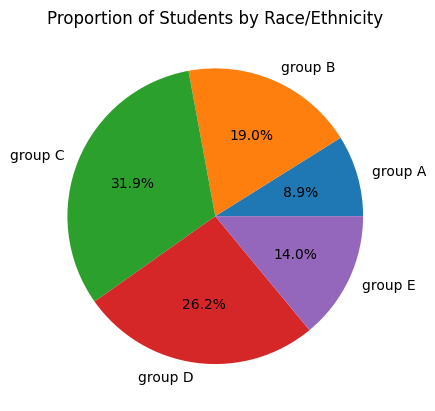

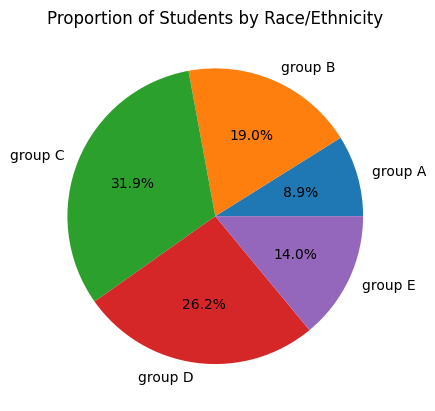

In [24]:
#11
def ethnicity_pie_chart(frame:pd.DataFrame) -> plt.Figure:  
    pdf = frame.copy()

    group=pdf.groupby(['race/ethnicity'])

    fig, ax = plt.subplots()
    ax.set_title("Proportion of Students by Race/Ethnicity")
    ax.pie(group.count()["lunch"].values, labels=group.groups.keys(),autopct='%1.1f%%')
    return fig

ethnicity_pie_chart(myframe)